In [1]:
import skimage
from skimage import draw
import numpy as np
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
import cv2
import os

In [2]:
PREDICTION_PATH = './prediction_labels_tests/'
TRAIN_PATH = '../data/train_images/'

In [3]:
images = [f for f in listdir(TRAIN_PATH) if isfile(join(TRAIN_PATH, f))]
print(str(len(images)) + ' train images found in folder: ' + TRAIN_PATH)

94 train images found in folder: ../data/train_images/


In [4]:
def treat_images(treatment_func, parameters, result_path):
    for img_path in images:
        parameters['img'] = cv2.imread(TRAIN_PATH + img_path, 0)
        result = treatment_func(parameters)

        cv2.imwrite(result_path + img_path, result)

In [ ]:
def get_gaussian_otsu_thresholding_from(parameters):
    blur = cv2.GaussianBlur(parameters['img'], (parameters['gKernelWidth'], parameters['gKernelHeight']), 0)
    ret3, result = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return result

In [6]:
def get_adaptive_mean_thresholding_from(img):
    result = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    result = np.where(result > 150, 0, 255)
    
    return result

In [7]:
def get_otsu_thresholding_from(img):
    ret2,result = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    result = np.where(result > 150, 0, 255)
    
    return result

In [8]:
def get_global_thresholding_from(img):
    ret1, result = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    result = np.where(result > 150, 0, 255)
    
    return result

# Binarisation OTSU avec flou Gaussien.

Je vais générer la binarisation avec plusieurs paramètres sur le flou Gaussien. Après je lancerai la vérification sur tous les sets de paramètres afin de déterminer quel est le meilleur set de paramètres.

In [ ]:
params = {}

MAX_THRESHOLD_VALUE = 255
MIN_THRESHOLD_VALUE = 0

"""MAX_KERNEL_VALUE = 30
MIN_KERNEL_VALUE = 21

for i in range(MIN_KERNEL_VALUE, MAX_KERNEL_VALUE, 2):
    params['gKernelWidth'] = i
    for j in range(MIN_KERNEL_VALUE, MAX_KERNEL_VALUE, 2):
        params['gKernelHeight'] = j
        path = PREDICTION_PATH + 'gKernelWidth ' + str(params['gKernelWidth']) + ' ; ' + 'gKernelHeight ' + str(params['gKernelHeight']) + '/'
        if not os.path.exists(path):
            os.makedirs(path)
        treat_images(get_gaussian_otsu_thresholding_from, params, path)"""

params['gKernelWidth'] = 29
params['gKernelHeight'] = 29
for i in range(MIN_THRESHOLD_VALUE, MAX_THRESHOLD_VALUE, 1):
    params['threshold'] = i
    path = PREDICTION_PATH + 'threshold ' + str(params['threshold']) + '/'
    if not os.path.exists(path):
        os.makedirs(path)
    treat_images(get_gaussian_otsu_thresholding_from, params, path)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[255 255 255 ...   0   0   0]
 [255 255

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

In [5]:
images = [f for f in listdir(TRAIN_PATH) if isfile(join(TRAIN_PATH, f))]
print(str(len(images)) + ' train images found in folder: ' + TRAIN_PATH)

94 train images found in folder: ../data/train_images/


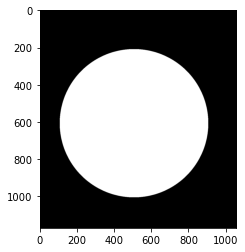

True

In [14]:
#for image in images:
NUM = 5

def find_circles_temp(img, distance):
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 2, minDist=80, param1=200, param2=100, minRadius=380, maxRadius=1000)
    result = np.zeros(img.shape)
    if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")

        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            rr, cc = draw.disk((x, y), r)
            try:
                result[cc, rr] = 255
            except:
                pass
    return result

img = cv2.imread(PREDICTION_PATH + images[NUM], 0)
result = find_circles_temp(img, 0)

plt.imshow(result, cmap='gray')
plt.show()
cv2.imwrite('final_result/' + images[NUM], result)

In [66]:
def find_circles(img, distance):
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 2, minDist=80, param1=100, param2=400, minRadius=80, maxRadius=1000)
    result = cv2.imread(TRAIN_PATH + images[NUM])
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            cv2.circle(result, (i[0], i[1]), i[2], (255, 0, 0), 18)
        
    return result

In [108]:
def find_circles_temp(img, distance):
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1.2, 200, param1=200, minRadius=100, maxRadius=500)
    result = np.zeros(img.shape)
    if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")

        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            rr, cc = draw.disk((x, y), r)
            try:
                result[cc, rr] = 255
            except:
                pass
    return result